**Building a CNN for the Emotional Facial Recognization**

Upload the dataset

In [1]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

chmod: cannot access 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download jonathanoheix/face-expression-recognition-dataset
!ls

face-expression-recognition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
face-expression-recognition-dataset.zip  images  sample_data


In [3]:
!unzip -o face-expression-recognition-dataset.zip
!ls

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating: images/validation/fear/9606.jpg  
  inflating:

In [4]:
#Exploratory Data

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [5]:
import os
import zipfile

zipfile.ZipFile('face-expression-recognition-dataset.zip').extractall()
os.listdir('./images/images/')

['validation', 'train']

In [6]:
#Checking the details of the train and test data

train_dir = './images/images/train/'
train_categories = set(os.listdir(train_dir))
validation_dir = './images/images/validation/'
test_categories = set(os.listdir(validation_dir))

if train_categories.symmetric_difference(test_categories):
  print("Warning!: ", train_categories.symmetric_difference(test_categories))

print(sorted(train_categories))
print(len(train_categories))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
7


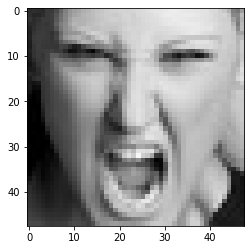

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt

sample_dir = os.path.join(train_dir, 'angry')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

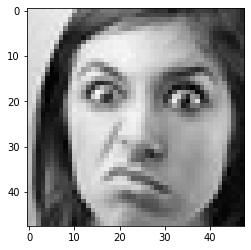

In [8]:
sample_dir = os.path.join(train_dir, 'disgust')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

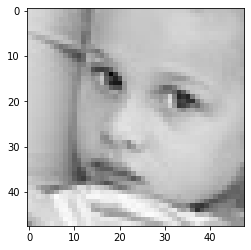

In [9]:
sample_dir = os.path.join(train_dir, 'fear')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

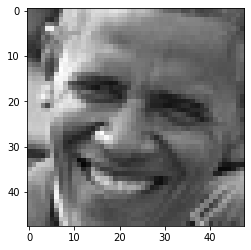

In [10]:
sample_dir = os.path.join(train_dir, 'happy')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

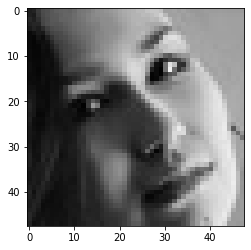

In [11]:
sample_dir = os.path.join(train_dir, 'neutral')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

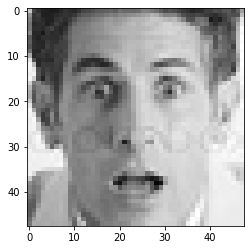

In [12]:
sample_dir = os.path.join(train_dir, 'surprise')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

In [13]:
img.min(), img.max()

(4, 255)

In [14]:
import tensorflow as tf

train_dir = './images/images/train/'

train_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=train_dir,
    batch_size=128,
    image_data_generator=None)

Found 28821 images belonging to 7 classes.


In [15]:
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 0)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 1)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 2)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 3)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 4)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 5)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 6)[0][0]])

./images/images/train/angry/0.jpg
./images/images/train/disgust/10018.jpg
./images/images/train/fear/10010.jpg
./images/images/train/happy/100.jpg
./images/images/train/neutral/1000.jpg
./images/images/train/sad/10006.jpg
./images/images/train/surprise/10007.jpg


In [16]:
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])



model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
#accuracy : 0.3589
"""

'\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(16, 3, padding=\'same\', activation=\'relu\',\n                           input_shape=(100, 100, 1)),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(32, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(64, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(512, activation=\'relu\'),\n    tf.keras.layers.Dense(7, activation=\'softmax\')\n])\n\n\n\nmodel.compile(optimizer="Adam",\n              loss=\'categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\nmodel.summary()\n#accuracy : 0.3589\n'

In [17]:
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
#accuracy of .37
"""

'\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(32, 3, activation=\'relu\',\n                           input_shape=(100, 100, 1)),\n    tf.keras.layers.MaxPooling2D((2,2)),\n    tf.keras.layers.Conv2D(32, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(64, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D((2,2)),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(64, activation=\'relu\'),\n    tf.keras.layers.Dense(7, activation=\'softmax\')\n])\n\n\nmodel.compile(optimizer="Adam",\n              loss=\'categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\nmodel.summary()\n#accuracy of .37\n'

In [18]:
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='tanh',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
#accuracy: 0.2089
"""

'\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(16, 3, activation=\'tanh\',\n                           input_shape=(100, 100, 1)),\n    tf.keras.layers.MaxPooling2D((2,2)),\n    tf.keras.layers.Conv2D(32, 3, padding=\'same\', activation=\'tanh\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(64, 3, padding=\'same\', activation=\'tanh\'),\n    tf.keras.layers.MaxPooling2D((2,2)),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(512, activation=\'tanh\'),\n    tf.keras.layers.Dense(7, activation=\'softmax\')\n])\n\n\nmodel.compile(optimizer="Adam",\n              loss=\'categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\nmodel.summary()\n#accuracy: 0.2089\n'

In [19]:
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='sigmoid')
    ])

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
#accuracy: 0.4068
"""

'\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(16, 3, padding=\'same\', activation=\'relu\',\n                           input_shape=(100, 100, 1)),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(32, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(64, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(512, activation=\'relu\'),\n    tf.keras.layers.Dense(7, activation=\'sigmoid\')\n    ])\n\nmodel.compile(optimizer="Adam",\n              loss=\'categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\nmodel.summary()\n#accuracy: 0.4068\n'

In [20]:
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='sigmoid')
    ])

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
#accuracy: 0.3682
"""

'\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(16, 3, padding=\'same\', activation=\'relu\',\n                           input_shape=(100, 100, 1)),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Conv2D(32, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(64, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(512, activation=\'relu\'),\n    tf.keras.layers.Dense(7, activation=\'sigmoid\')\n    ])\n\nmodel.compile(optimizer="Adam",\n              loss=\'categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\nmodel.summary()\n#accuracy: 0.3682\n'

In [21]:
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='sigmoid')
    ])

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
#increased the epochs to 100 
#accuracy: .82
"""

'\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(16, 3, padding=\'same\', activation=\'relu\',\n                           input_shape=(100, 100, 1)),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(32, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Conv2D(64, 3, padding=\'same\', activation=\'relu\'),\n    tf.keras.layers.MaxPooling2D(),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(512, activation=\'relu\'),\n    tf.keras.layers.Dense(7, activation=\'sigmoid\')\n    ])\n\nmodel.compile(optimizer="Adam",\n              loss=\'categorical_crossentropy\',\n              metrics=[\'accuracy\'])\n\nmodel.summary()\n#increased the epochs to 100 \n#accuracy: .82\n'

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='sigmoid')
    ])

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
#increased the epochs to 100 
#accuracy: 
#added the drop out layer 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/images/'
datagen_train  = ImageDataGenerator()
data_val =ImageDataGenerator()


train_set = datagen_train.flow_from_directory(train_dir+"train",
                                              target_size = (100,100),
                                              color_mode = 'grayscale',
                                              batch_size = 28,
                                              class_mode = 'categorical',)                                            

val_set = data_val.flow_from_directory(train_dir+"validation",
                                              target_size = (100,100),
                                              color_mode = 'grayscale',
                                              batch_size = 28,
                                              class_mode = 'categorical')                                            


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    min_delta=0.00005,
    patience=3,
    verbose=1,
    restore_best_weights=True,
 

)

history = model.fit(train_set,
    steps_per_epoch = 100,
    epochs=200, 
    callbacks=[early_stopping],
)

Epoch 1/200
100/100 [==============================] - 30s 293ms/step - loss: 7.7726 - accuracy: 0.2179
Epoch 2/200
100/100 [==============================] - 27s 265ms/step - loss: 1.8082 - accuracy: 0.2596
Epoch 3/200
100/100 [==============================] - 26s 264ms/step - loss: 1.7657 - accuracy: 0.2905
Epoch 4/200
100/100 [==============================] - 27s 266ms/step - loss: 1.7379 - accuracy: 0.3000
Epoch 5/200
100/100 [==============================] - 26s 262ms/step - loss: 1.7073 - accuracy: 0.3182
Epoch 6/200
100/100 [==============================] - 26s 263ms/step - loss: 1.6630 - accuracy: 0.3361
Epoch 7/200
100/100 [==============================] - 26s 261ms/step - loss: 1.6952 - accuracy: 0.3193
Epoch 8/200
100/100 [==============================] - 28s 278ms/step - loss: 1.6236 - accuracy: 0.3843
Epoch 9/200
100/100 [==============================] - 26s 261ms/step - loss: 1.6098 - accuracy: 0.3714
Epoch 10/200
100/100 [==============================] - 26s 262m

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(history.history['accuracy']))),
         history.history['accuracy'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(history.history['loss']))), history.history['loss'])
plt.show()

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/images/validation'

                                           

test_image_iterator =tf.keras.preprocessing.image.DirectoryIterator(
    directory = test_dir,
    target_size = (100,100),
    color_mode = 'grayscale',
    batch_size = 28,
    class_mode = 'categorical',
    image_data_generator=None)

model.evaluate(test_image_iterator)
a = model.predict(test_image_iterator,)
a

In [ ]:
a[0]
loc = []
for b in range(len(a)):
  loc.append(np.argmax(a[b])
  )
print(loc)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import numpy as np
y_true = test_image_iterator.classes

y_pred = loc

print(f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true, y_pred, normalize=True))
print(precision_score(y_true, y_pred, average = "weighted"))

In [ ]:
print(y_true[4])
print(y_pred[4])

In [ ]:
plt.imshow(pred[4])